In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dbf

In [2]:
from simpledbf import Dbf5

ruta_archivo2 = "Datasets/taxi_zones.dbf"
dbf = Dbf5(ruta_archivo2)
df = dbf.to_dataframe()

df.head()

PyTables is not installed. No support for HDF output.
SQLalchemy is not installed. No support for SQL output.


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OBJECTID    263 non-null    int64  
 1   Shape_Leng  263 non-null    float64
 2   Shape_Area  263 non-null    float64
 3   zone        263 non-null    object 
 4   LocationID  263 non-null    int64  
 5   borough     263 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 12.5+ KB


In [4]:
df.rename(columns={
    'OBJECTID': 'IDObjeto',
    'Shape_Leng': 'LongitudForma', # longitud total de los límites de ese distrito o zona.
    'Shape_Area': 'ÁreaForma', #el área total dentro de los límites de la entidad
    'zone': 'Zona',
    'LocationID': 'IDUbicación',
    'borough': 'Barrio'
}, inplace=True)


In [5]:
df

,IDObjeto,LongitudForma,ÁreaForma,Zona,IDUbicación,Barrio
0,1,0.116357,0.000782,Newark Airport,1,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,260,0.133514,0.000422,Woodside,260,Queens
260,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [6]:
# Contar los valores nulos en cada columna
nulos_por_columna = df.isnull().sum()

# Mostrar nulos
print(nulos_por_columna)

IDObjeto         0
LongitudForma    0
ÁreaForma        0
Zona             0
IDUbicación      0
Barrio           0
dtype: int64


Barrio
Queens           69
Manhattan        69
Brooklyn         61
Bronx            43
Staten Island    20
EWR               1
Name: count, dtype: int64


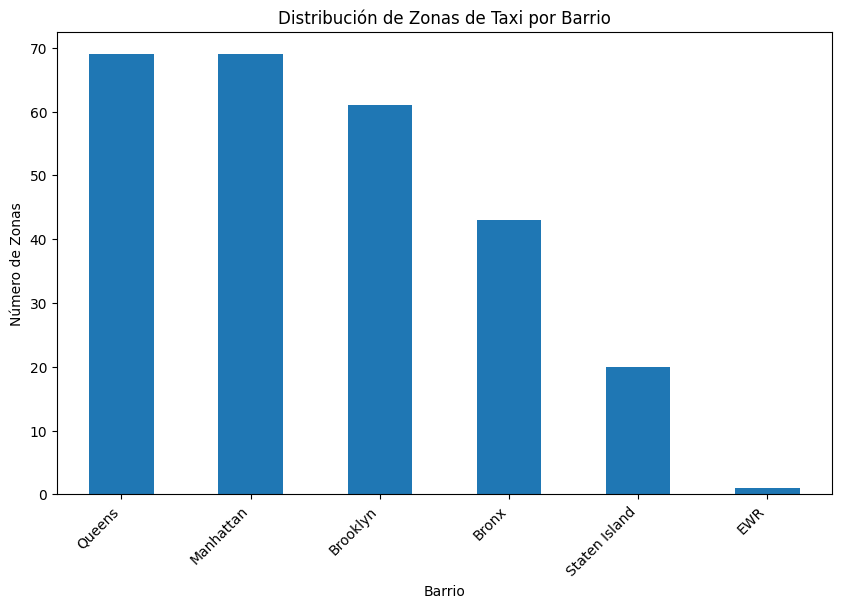

In [7]:
# número de zonas por barrio
zonas_por_barrio = df['Barrio'].value_counts()

# mostrar el conteo de zonas por barrio
print(zonas_por_barrio)

# gráfico de barras de la distribución de zonas por barrio
plt.figure(figsize=(10, 6))
zonas_por_barrio.plot(kind='bar')
plt.title('Distribución de Zonas de Taxi por Barrio')
plt.xlabel('Barrio')
plt.ylabel('Número de Zonas')
plt.xticks(rotation=45, ha='right')  # rotar las etiquetas del eje x 
plt.show()